This will be the line attractor that is meant to illustrate the simpliest case of loop switching, one layer. Will attempt to replicate the proposed tempo switching behavior in the Thaut tapping paper. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [35]:
class attractor:
    def __init__(self, n_units, exc_spread=1, inp_scale=1, exc_scale = 1, inh_scale = 1, dop_scale = 1):
        
        #number of units in the line
        self.n_units = n_units

        #the input weight matrix just scales the input up or down, allows for adjusting of excitation while still using intuitive inputs (I think)
        self.W_input = np.identity(n_units) * inp_scale

        #generates the internal excitatory weight matrix, exc_spread controls how far excitatory connections reach, exc_scale controls how strong the excitatory connections are
        #its just a collections of Gaussians, exc_spread controls the sd
        self.W_exc = np.zeros((n_units,n_units))
        unit_ids = np.arange(0,n_units,1)        
        for i in range(0,n_units):
            ###the multiplying by n_units is because it is a pdf that decreases with the number of units involved, there might be a smarter way around this 
            ###but not using a pdf does not work so I will keep moving for now, either way I am not sure it makes a difference
            self.W_exc[i] = stats.norm.pdf(unit_ids, i, exc_spread) * n_units * exc_scale
        
        #there is tonic inhibition that scales with the total amount of activity in the network, similar to the basal ganglia
        self.W_inh = np.ones((n_units,n_units)) * (-1 * inh_scale)

        #the dopamine modulates the excitatory current, this is how strong the modulation is
        self.dop_scale = dop_scale
        
        #just plotting the weights so they can be checked
        plt.figure(1)
        plt.imshow(self.W_exc, cmap="plasma")
        plt.colorbar()
        plt.title("W_exc matrix")

        plt.figure(2)
        plt.plot(self.W_exc[int(np.round(n_units/2,0))], color="steelblue")
        plt.title("Excitatory weights from unit "+str(int(np.round(n_units/2,0)))+" to all other units")
        plt.xlabel("Unit Number")
        plt.ylabel("Connection Strength")

    #simulates the attractor receiving the input 
    def run(self, input, dopamine):
        #number of time points and time constant
        n_steps = len(input[0])
        dt = 0.1

        #matrix to hold the activations of all the units
        activations = np.zeros((self.n_units, n_steps))
        

        for i in range(0, n_steps-1):
            activations[:,i+1] = activations[:,i] + dt * (self.non_lin(np.matmul(self.W_input,input[:,i]) + np.matmul(self.W_exc,activations[:,i]) * dopamine[i] * self.dop_scale + np.matmul(self.W_inh,activations[:,i])) - activations[:,i])
        

        plt.figure(3)
        plt.imshow(input)
        plt.ylabel("unit")
        plt.xlabel("time")
        plt.colorbar()

        plt.figure(4)
        plt.imshow(activations)
        plt.ylabel("unit")
        plt.xlabel("time")
        plt.colorbar()

        plt.figure(5)
        plt.title("activations of various units")
        for i in range(10):
            x = random.randint(0,self.n_units-1)
            plt.plot(activations[x], label="unit "+str(x), alpha=0.5)
        plt.legend()

        plt.figure(6)
        plt.title("Activations at certain steps")
        plt.plot(activations[:,int(n_steps/4)],label=str("Activations at time point "+str(int(n_steps/4))))
        plt.plot(activations[:,int(n_steps/2)],label=str("Activations at time point "+str(int(n_steps/2))))
        plt.plot(activations[:,int(n_steps/2)+int(n_steps/4)],label=str("Activations at time point "+str(int(n_steps/2)+int(n_steps/4))))
        plt.plot(activations[:,int(n_steps-1)],label=str("Activations at time point "+str(int(n_steps-1))))
        plt.ylabel("activation")
        plt.xlabel("unit")
        plt.legend()

    def non_lin(self, vec):
        
        vec = np.tanh(vec)
        for i in range(0,len(vec)):
            if vec[i] < 0:
                vec[i] = 0

        return vec


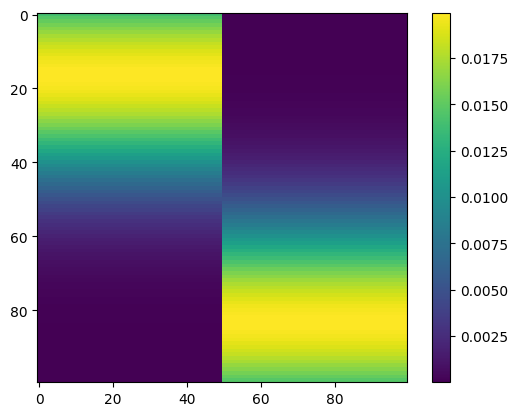

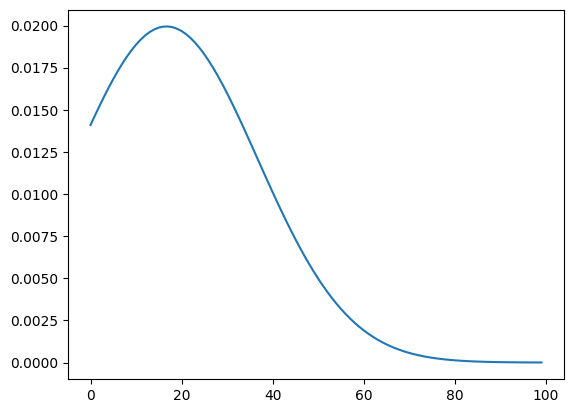

In [56]:
#going to create some input cases here to keep code clean

### case 1, simple Gaussian bump about a third of the way into the line
n_units = 100
n_steps = 50
sd = 20 
case1 = np.zeros((n_units,n_steps))

unit_ids = np.arange(0,100,1)
for i in range(0,n_steps):
    case1[:,i] = stats.norm.pdf(unit_ids, n_units/3, sd)

### case 2, simple gaussian bump that then jumps down the line, about a third
n_units = 100
n_steps = 100
sd
case2 = np.zeros((n_units,n_steps))

unit_ids = np.arange(0,100,1)
for i in range(0,int(n_steps/2)):
    case2[:,i] = stats.norm.pdf(unit_ids, n_units/3, sd)
for i in range(int(n_steps/2),n_steps):
    case2[:,i] = stats.norm.pdf(unit_ids, n_units*(2/3)-20, sd)

### case 3, going to do the same as above, but have the jump be further so there is less overlap, I think it will help
n_units = 100
n_steps = 100
sd
case3 = np.zeros((n_units,n_steps))

unit_ids = np.arange(0,100,1)
for i in range(0,int(n_steps/2)):
    case3[:,i] = stats.norm.pdf(unit_ids, n_units * 1/6, sd)
for i in range(int(n_steps/2),n_steps):
    case3[:,i] = stats.norm.pdf(unit_ids, n_units* 5/6, sd)   


plt.figure(1)
plt.imshow(case3)
plt.colorbar()

plt.figure(2)
plt.plot(case3[:,1])

I am going to leave this as unedited, as as far as I can tell, this is showing roughly what we can expect when there is shift and no decrease in dopamine. The intially activated loop "drags" the most activated up a little bit and yields an intermediete value. Then over time the inhibition brings the attractor to a steady state. 

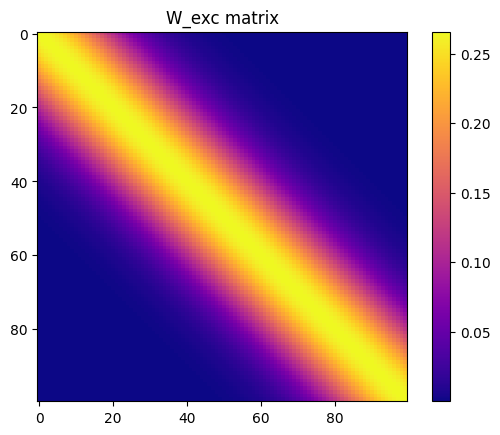

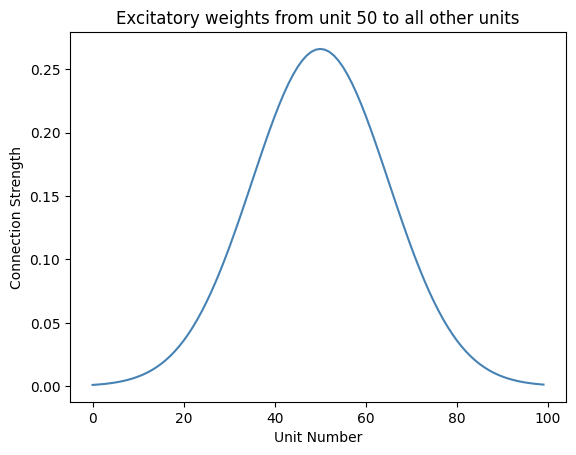

In [51]:
line = attractor(n_units = 100, exc_spread = 15, inp_scale = 5, exc_scale = 0.1, inh_scale = 1, dop_scale = 2)


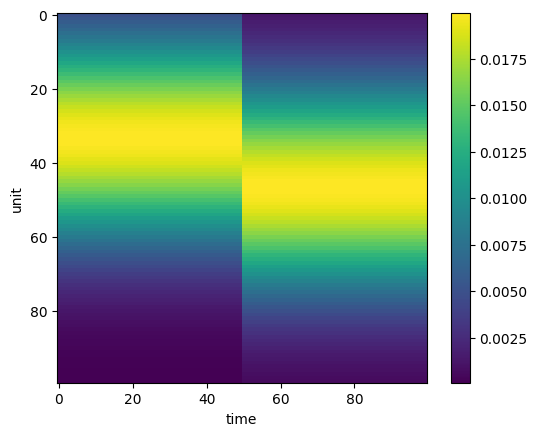

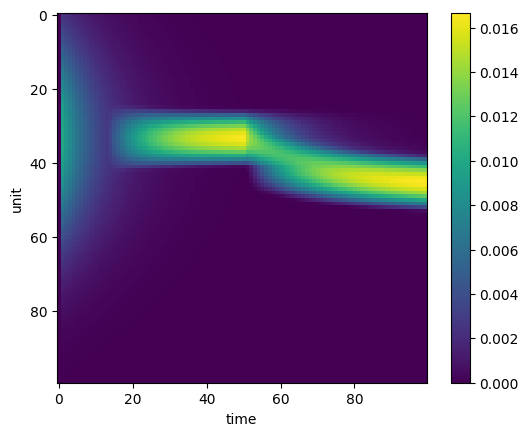

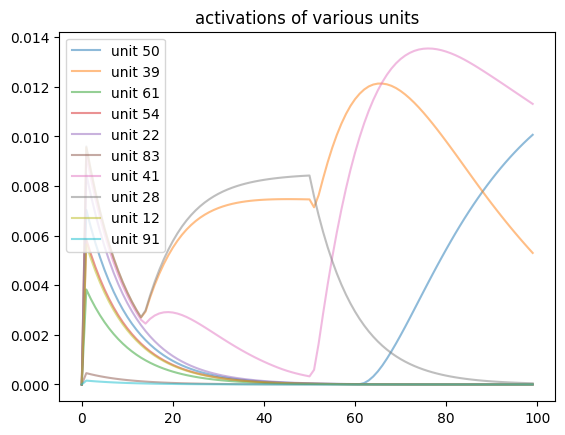

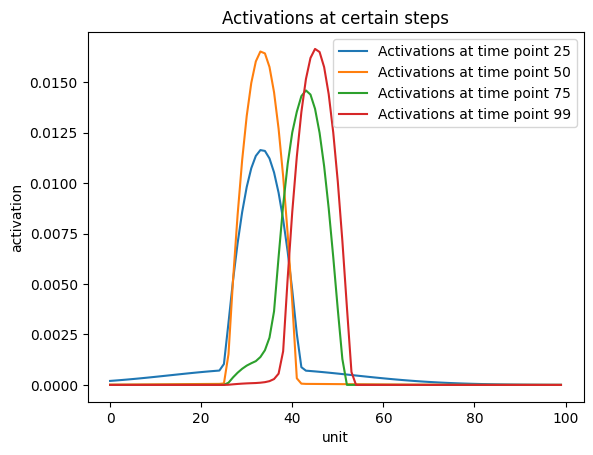

In [52]:
line.run(case2,np.ones(100))

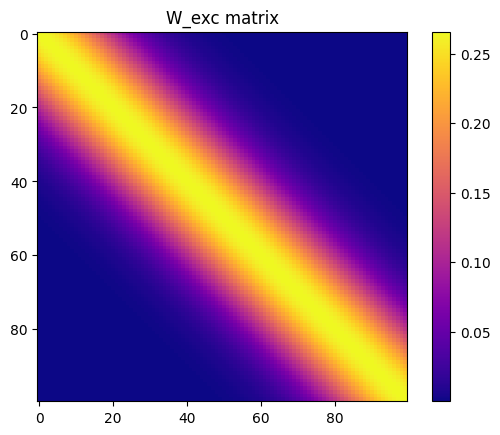

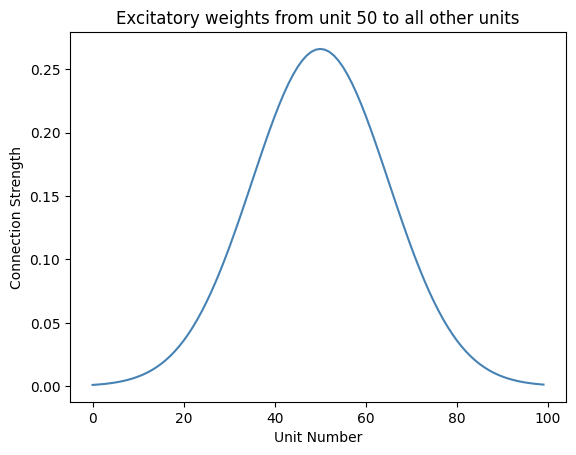

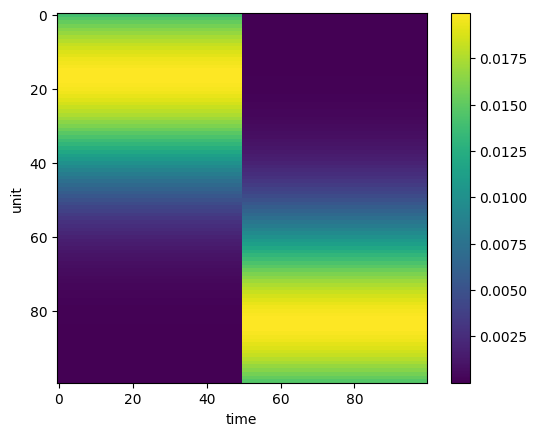

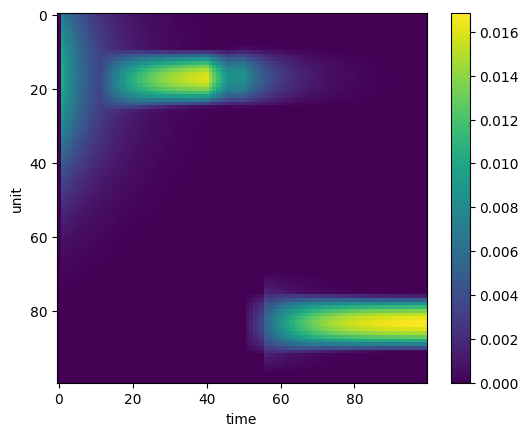

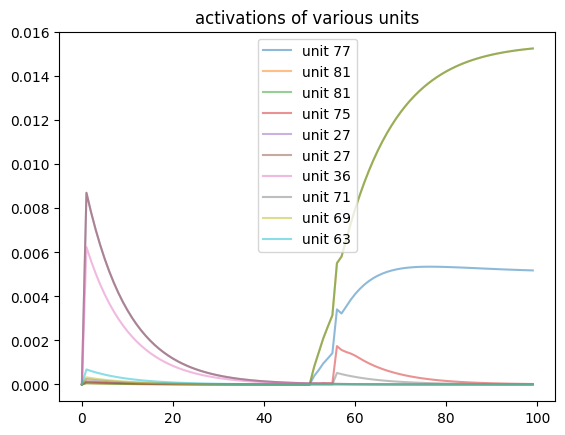

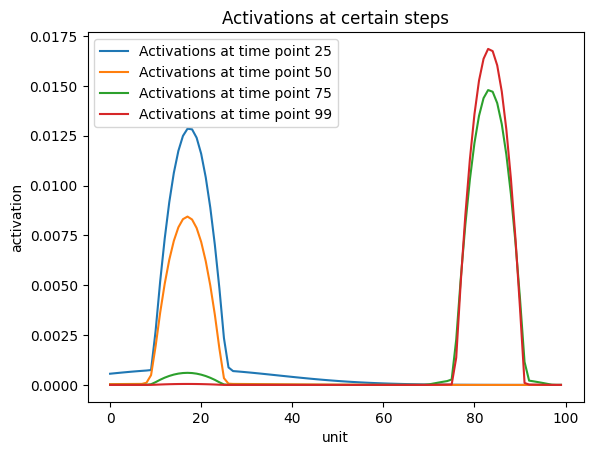

In [57]:
line2 = attractor(n_units = 100, exc_spread = 15, inp_scale = 5, exc_scale = 0.1, inh_scale = 1, dop_scale = 2)
dopamine = np.ones(100)
dopamine[40:55] = 0
line2.run(case3,dopamine)